In [69]:
import pandas as pd
import yfinance as yf
import seaborn as sns
import riskfolio as rp

In [70]:
assets = ['VOO','TLT','SLV','ENVX','NKE','OSCR','SNOW','AMD','BA','PYPL','SLB','HIMS','DLO']

data = yf.download(assets, start= '2023-01-01', end= '2025-02-14')
data = data.loc[:, 'Close']
data.head()

[*********************100%***********************]  13 of 13 completed


Ticker,AMD,BA,DLO,ENVX,HIMS,NKE,OSCR,PYPL,SLB,SLV,SNOW,TLT,VOO
Date,,,,,,,,,,,,,
2023-01-03,64.019997,195.389999,15.370,12.12,6.32,115.257530,2.46,74.580002,48.942043,22.049999,135.500000,93.849487,339.978546
2023-01-04,64.660004,203.639999,15.860,7.15,6.61,117.645172,2.62,77.690002,49.132111,21.889999,130.440002,95.135208,342.426483
2023-01-05,62.330002,204.990005,15.015,7.54,6.10,117.072533,2.57,76.269997,50.053928,21.389999,121.559998,95.532951,338.686584
2023-01-06,63.959999,213.000000,15.720,8.05,6.13,120.867538,2.55,76.480003,51.793037,21.920000,124.059998,97.290436,346.389771
2023-01-09,67.239998,208.570007,15.880,8.32,6.46,121.178131,2.62,77.080002,52.876419,21.740000,134.429993,97.808449,346.137146


In [71]:
# Returns
returns = data.pct_change().dropna()
returns

returns.median().sort_values(ascending=False).to_frame(name='median_return')

,median_return
Ticker,
PYPL,0.001903
HIMS,0.001489
SNOW,0.001157
VOO,0.000997
SLB,0.000873
SLV,0.000460
AMD,0.000180
BA,0.000176
TLT,0.000000


<Axes: >

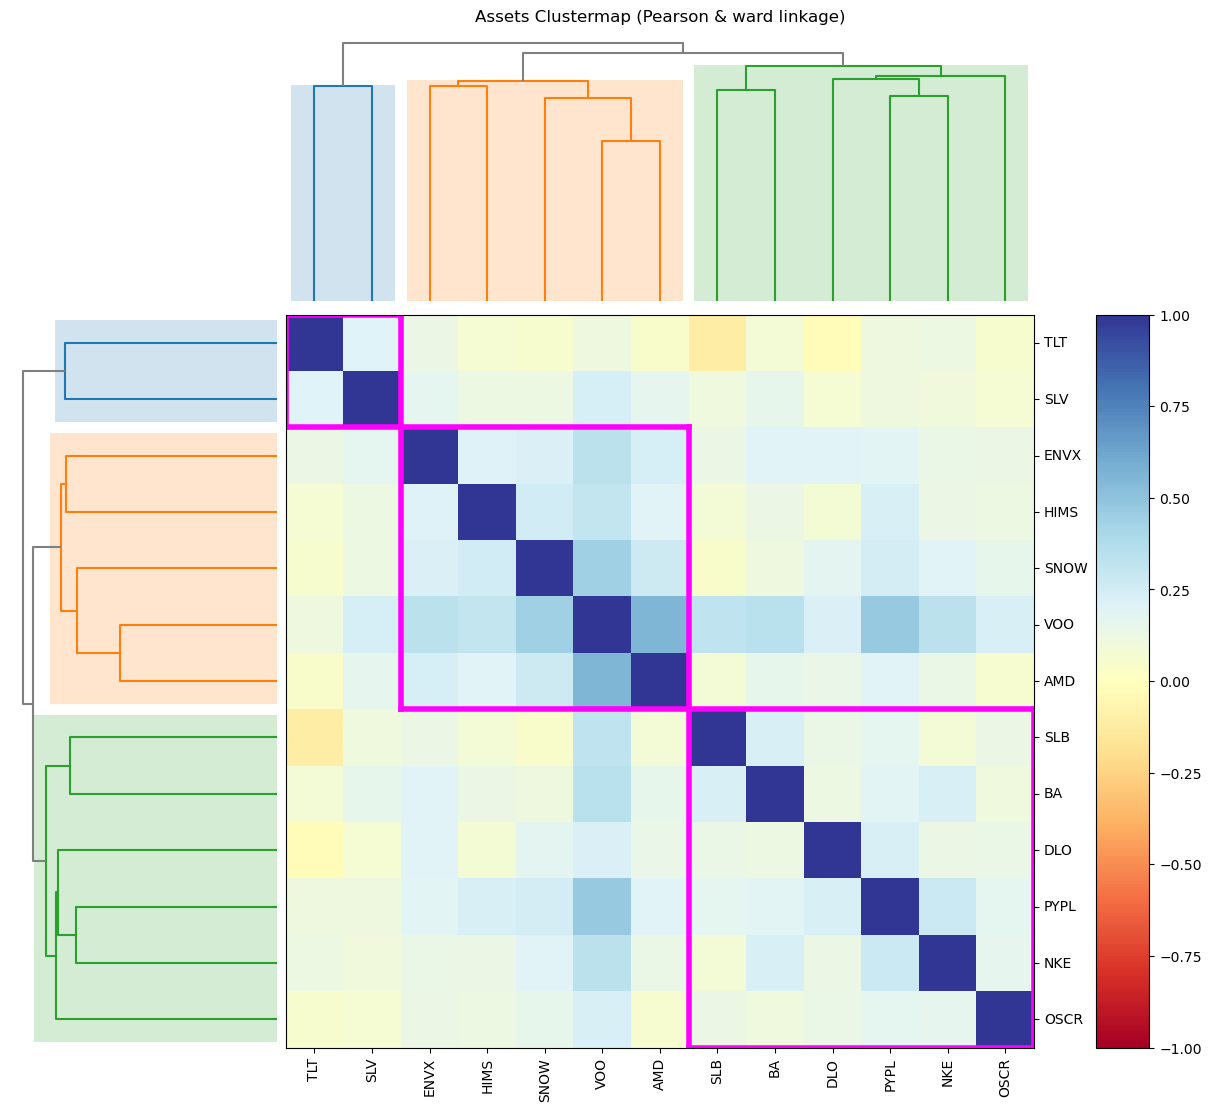

In [72]:
rp.plot_clusters(
    returns= returns,
    codependence='pearson',
    linkage='ward',
    k=None,
    max_k=10,
    leaf_order=True,
    dendrogram=True,
    ax=None
)